# Task 1 Simple Text-based Similarity and Retrieval

### Team E
Version 1.0.1
Date: 14/11/2023

## Import Libraries  

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import math
import matplotlib.pyplot as plt

In [2]:
from ret import read_data # utility func to load data
from ret import get_id_from_info # utility func to return id by entering song's info
from ret import display_res # utility func to display results 
from ret import audio_based # modularized audio based retrieval system
from ret import text_based # modularized text based retrieval system
from ret import random_baseline # base line retrieval system that returns random results 
from ret import cos_sim # wrapper function to calculate cosine similarity
from ret import euc_sim # wrapper function to calculate euclidean similarity 
from ret import get_info_from_ids #utility func to return infro from id
from ret import get_genre_from_ids
from ret import get_genre_from_query
from ret import calculate_precision 
from ret import calculate_recall
from ret import count_relevant_songs_in_dataset
from ret import count_relevant_songs_in_result
from ret import average_precision
from ret import average_recall
from ret import calculate_recall_at_k
from ret import calculate_precision_at_k

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Load Data

In [3]:
"""
Please put data files in ""./data/" before use 
"""

info = read_data("information")
tfidf = read_data("lyrics_tf-idf")
word2vec = read_data("lyrics_word2vec")
bert = read_data("lyrics_bert")
mfcc_stats = read_data("mfcc_stats")
mfcc_bow = read_data("mfcc_bow")
blf_correlation = read_data("blf_correlation")
ivec256 = read_data("ivec256")
musicnn = read_data("musicnn")
genres = read_data("genres")

genres

,id,genre
0,01Yfj2T3YTwJ1Yfy,"['rock', 'christian rock']"
1,01gyRHLquwXDlhkO,"['hip hop', 'rap', 'grindcore', 'death metal']"
2,01rMxQv6vhyE1oQX,"['rock', 'pop punk']"
3,02RGE9FNH65RtMS7,"['trance', 'techno', 'progressive trance']"
4,02ZnlCGZEbkfCDxo,"['pop', 'italian pop', 'latin', 'europop', 'am..."
...,...,...
10089,zyzILCQvVeUFIINi,"['rock', 'pop', 'indie rock', 'folk rock', 'ne..."
10090,zzgS4ZqyswamEWNj,"['pop', 'rock', 'teen pop', 'soundtrack', 'sin..."
10091,zzoFYDMlqU1X2zz1,"['jazz', 'jazz fusion']"
10092,zzpkRCGA5ud8q4mv,"['soul', 'blues', 'r b', 'blues rock', 'southe..."


In [4]:
dataset_genres = genres.values.tolist()


## Dictionary to Store Results 

In [5]:
"""
Dict to store results:
query format: res["trackTRACKNUMBER"]["REPRESENTATION"]["SIMILARITYFUNCTION"]
sample query: res["track1"]["tfidf"]["cos_sim"]

returns - list[str] 
list containing ids of a retrieved tracks 

After running, use display_res(res["trackTRACKNUMBER"]["REPRESENTATION"]["SIMILARITYFUNCTION"],info) to display results
e.g. display_res(res["track1"]["tfidf"]["cos_sim"],info)

"""
res={
    "track1": 
    {
    "base_line": None,
    "mfcc_bow":
    {
        "cos_sim": None,
        "euc_sim": None
    },
    "mfcc_stats":
    {
        "cos_sim": None,
        "euc_sim": None
    }
    },
    "track2": 
    {
    "base_line": None,
    "mfcc_bow":
    {
        "cos_sim": None,
        "euc_sim": None
    },
    "mfcc_stats":
    {
        "cos_sim": None,
        "euc_sim": None
    }
    },
    "track3": 
    {
    "base_line": None,
    "mfcc_bow":
    {
        "cos_sim": None,
        "euc_sim": None
    },
    "mfcc_stats":
    {
        "cos_sim": None,
        "euc_sim": None
    }
    
}
}

## Track 1 
"Love Me" "The 1975"

In [6]:
name = "Love Me"
artist = "The 1975"
id_track1 = get_id_from_info(name, artist, info)
id_track1

'rTXO5VOLQGcypcmB'

In [7]:
res["track1"]["mfcc_bow"]["cos_sim"] = audio_based(id=id_track1, repr=mfcc_bow, N=10, sim_func=cos_sim)

In [8]:
res["track1"]["mfcc_stats"]["cos_sim"] = audio_based(id=id_track1, repr=mfcc_stats, N=10, sim_func=cos_sim)

In [9]:
query_genre1 = get_genre_from_query(id_track1, genres)
query_genre1

[('rTXO5VOLQGcypcmB',
  "['pop', 'rock', 'indie pop', 'electropop', 'indie rock', 'funk', 'funk rock']")]

In [49]:
#retrieve 100 results (audio based)
q1_genres_mfcc_stats = get_genre_from_ids(audio_based(id=id_track1, repr=mfcc_stats, N=100, sim_func=cos_sim), genres)
q1_genres_blf_correlation = get_genre_from_ids(audio_based(id=id_track1, repr=blf_correlation, N=100, sim_func=cos_sim), genres)
q1_genres_ivec256 = get_genre_from_ids(audio_based(id=id_track1, repr=ivec256, N=100, sim_func=cos_sim), genres)
q1_genres_musicnn = get_genre_from_ids(audio_based(id=id_track1, repr=musicnn, N=100, sim_func=cos_sim), genres)
#text based
q1_genres_tfidf = get_genre_from_ids(text_based(id=id_track1, repr=tfidf, N=100, sim_func=cos_sim), genres)
q1_genres_word2vec = get_genre_from_ids(text_based(id=id_track1, repr=word2vec, N=100, sim_func=cos_sim),genres)
q1_genres_bert =  get_genre_from_ids(text_based(id=id_track1, repr=bert, N=100, sim_func=cos_sim),genres)
q1_genres_random = get_genre_from_ids(random_baseline(id=id_track1, info=info, N=100),genres)


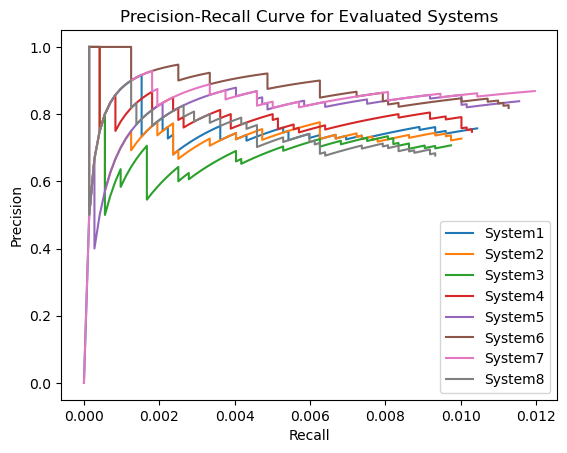

In [51]:
#plot precision recall curve for query track1 for all evaluated systems

system_data = {
    "System1": {"query_genre": query_genre1, "retrieved_genres": q1_genres_mfcc_stats, "dataset_genres": dataset_genres},
    "System2": {"query_genre": query_genre1, "retrieved_genres": q1_genres_blf_correlation, "dataset_genres": dataset_genres},
    "System3": {"query_genre": query_genre1, "retrieved_genres": q1_genres_ivec256, "dataset_genres": dataset_genres},
    "System4": {"query_genre": query_genre1, "retrieved_genres": q1_genres_musicnn, "dataset_genres": dataset_genres},
    "System5": {"query_genre": query_genre1, "retrieved_genres": q1_genres_tfidf, "dataset_genres": dataset_genres},
    "System6": {"query_genre": query_genre1, "retrieved_genres": q1_genres_word2vec, "dataset_genres": dataset_genres},
    "System7": {"query_genre": query_genre1, "retrieved_genres": q1_genres_bert, "dataset_genres": dataset_genres},
    "System8": {"query_genre": query_genre1, "retrieved_genres": q1_genres_random, "dataset_genres": dataset_genres},
}

#Vary k from 1 to 100
k_values = list(range(1, 100))

for system_name, system_info in system_data.items():
    precisions = []
    recalls = []

    for k in k_values:
        precision = calculate_precision_at_k(system_info["query_genre"], system_info["retrieved_genres"], k)
        recall = calculate_recall_at_k(system_info["query_genre"], system_info["retrieved_genres"], system_info["dataset_genres"], k)

        precisions.append(precision)
        recalls.append(recall)

    plt.plot(recalls, precisions, label=system_name)

# Add labels and legend
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Evaluated Systems")
plt.legend()

plt.show()

In [30]:
calculate_precision_at_k(query_genre1, retrieved_genres_mfcc_stats, 10)

0.9

In [31]:
calculate_precision(query_genre1,retrieved_genres_mfcc_stats10)

0.9

In [32]:
calculate_recall_at_k(query_genre1, retrieved_genres_mfcc_stats, dataset_genres, 10)

0.001252261026854042

In [33]:
calculate_recall(query_genre1,retrieved_genres_mfcc_stats10, dataset_genres)

0.001252261026854042

In [34]:
count_relevant_songs_in_dataset(query_genre1,dataset_genres)

7187

In [35]:
count_relevant_songs_in_result(query_genre1,retrieved_genres_mfcc_stats)

76

In [36]:
#audio based recall
r_mfcc_stats = calculate_recall(query_genre1, retrieved_genres_mfcc_stats, dataset_genres)
r_blf_correlation = calculate_recall(query_genre1, retrieved_genres_blf_correlation, dataset_genres)
r_ivec256 = calculate_recall(query_genre1, retrieved_genres_ivec256, dataset_genres)
r_musicnn = calculate_recall(query_genre1, retrieved_genres_musicnn, dataset_genres)
#text based recall
r_tfidf = calculate_recall(query_genre1, retrieved_genres_tfidf, dataset_genres)
r_word2vec = calculate_recall(query_genre1, retrieved_genres_word2vec, dataset_genres)
r_bert = calculate_recall(query_genre1,  retrieved_genres_bert, dataset_genres)
r_random = calculate_recall(query_genre1, retrieved_genres_random, dataset_genres)

In [37]:
display_res(res["track1"]["mfcc_bow"]["cos_sim"], info)

Name: High Horse                               Singer: Kacey Musgraves
Name: SPRORGNSM                                Singer: Superorganism
Name: Goin' Crazy                              Singer: Ashley Tisdale
Name: Do Somethin'                             Singer: Britney Spears
Name: Ni**as In Paris                          Singer: Jay-Z & Kanye West
Name: Good... Good                             Singer: Belinda
Name: Honey, Don't Kill My Vibe                Singer: YESEO
Name: Girlfriend                               Singer: Bea Miller
Name: Jealousy                                 Singer: Paris Hilton
Name: No Time For Love                         Singer: Bryan Adams


In [38]:
display_res(res["track1"]["mfcc_stats"]["cos_sim"], info)

Name: Falling for You                          Singer: Tamia
Name: Sunshine on a Rainy Day                  Singer: Emma Bunton
Name: Honey, Honey                             Singer: ABBA
Name: Do You Wanna Come Over?                  Singer: Britney Spears
Name: The Thoughts That Give Me the Creeps     Singer: Hellogoodbye
Name: Good... Good                             Singer: Belinda
Name: Everybody's Weird                        Singer: dEUS
Name: Hesitation                               Singer: Stacie Orrico
Name: Fm                                       Singer: Nathan Haines
Name: Amnesia                                  Singer: Chumbawamba


## Track 2 

"One" "U2"

In [61]:
name = 'One'
artist = 'U2'
id_track2 = get_id_from_info(name, artist, info)

In [62]:
res["track2"]["mfcc_bow"]["cos_sim"] = audio_based(id=id_track2, repr=mfcc_bow, N=10, sim_func=cos_sim)

In [63]:
res["track2"]["mfcc_stats"]["cos_sim"] = audio_based(id=id_track2, repr=mfcc_stats, N=10, sim_func=cos_sim)

In [64]:
query_genre2 = get_genre_from_query(id_track2, genres)
query_genre2

[('Ddg8zi2tOooa4HH1',
  "['rock', 'classic rock', 'pop', 'alternative rock', 'soft rock', 'pop rock', 'easy listening', 'irish rock']")]

In [76]:
#retrieve 100 results (audio based)
q2_genres_mfcc_stats = get_genre_from_ids(audio_based(id=id_track2, repr=mfcc_stats, N=100, sim_func=cos_sim), genres)
q2_genres_blf_correlation = get_genre_from_ids(audio_based(id=id_track2, repr=blf_correlation, N=100, sim_func=cos_sim), genres)
q2_genres_ivec256 = get_genre_from_ids(audio_based(id=id_track2, repr=ivec256, N=100, sim_func=cos_sim), genres)
q2_genres_musicnn = get_genre_from_ids(audio_based(id=id_track2, repr=musicnn, N=100, sim_func=cos_sim), genres)
#text based
q2_genres_tfidf = get_genre_from_ids(text_based(id=id_track2, repr=tfidf, N=100, sim_func=cos_sim), genres)
q2_genres_word2vec = get_genre_from_ids(text_based(id=id_track2, repr=word2vec, N=100, sim_func=cos_sim),genres)
q2_genres_bert =  get_genre_from_ids(text_based(id=id_track2, repr=bert, N=100, sim_func=cos_sim),genres)
q2_genres_random = get_genre_from_ids(random_baseline(id=id_track2, info=info, N=100),genres)

q2_genres_mfcc_stats10 = get_genre_from_ids(audio_based(id=id_track2, repr=mfcc_stats, N=10, sim_func=cos_sim), genres)

In [77]:
calculate_precision(query_genre2,q2_genres_mfcc_stats10)

0.6

In [78]:
calculate_precision_at_k(query_genre2,q2_genres_mfcc_stats,10)

0.6

In [79]:
calculate_recall(query_genre2,q2_genres_mfcc_stats10,dataset_genres)

0.0008525149190110827

In [80]:
calculate_recall_at_k(query_genre2,q2_genres_mfcc_stats, dataset_genres, 10)

0.0008525149190110827

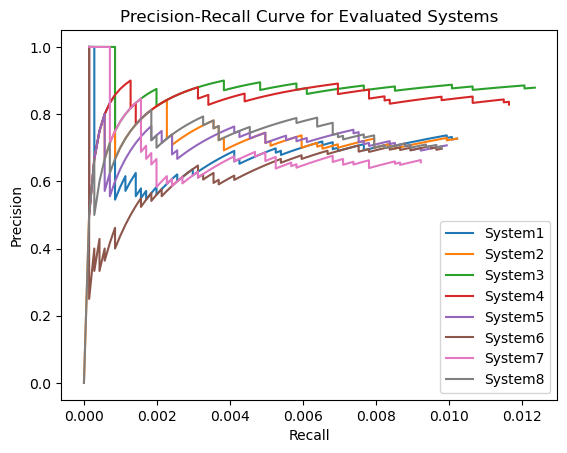

In [93]:
#plot precision recall curve for query track2 for all evaluated systems

system_data = {
    "System1": {"query_genre": query_genre2, "retrieved_genres": q2_genres_mfcc_stats, "dataset_genres": dataset_genres},
    "System2": {"query_genre": query_genre2, "retrieved_genres": q2_genres_blf_correlation, "dataset_genres": dataset_genres},
    "System3": {"query_genre": query_genre2, "retrieved_genres": q2_genres_ivec256, "dataset_genres": dataset_genres},
    "System4": {"query_genre": query_genre2, "retrieved_genres": q2_genres_musicnn, "dataset_genres": dataset_genres},
    "System5": {"query_genre": query_genre2, "retrieved_genres": q2_genres_tfidf, "dataset_genres": dataset_genres},
    "System6": {"query_genre": query_genre2, "retrieved_genres": q2_genres_word2vec, "dataset_genres": dataset_genres},
    "System7": {"query_genre": query_genre2, "retrieved_genres": q2_genres_bert, "dataset_genres": dataset_genres},
    "System8": {"query_genre": query_genre2, "retrieved_genres": q2_genres_random, "dataset_genres": dataset_genres},
}

#Vary k from 1 to 100
k_values = list(range(1, 100))

for system_name, system_info in system_data.items():
    precisions = []
    recalls = []

    for k in k_values:
        precision = calculate_precision_at_k(system_info["query_genre"], system_info["retrieved_genres"], k)
        recall = calculate_recall_at_k(system_info["query_genre"], system_info["retrieved_genres"], system_info["dataset_genres"], k)

        precisions.append(precision)
        recalls.append(recall)

    plt.plot(recalls, precisions, label=system_name)

# Add labels and legend
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Evaluated Systems")
plt.legend()

plt.show()

In [ ]:
display_res(res["track2"]["mfcc_bow"]["cos_sim"], info)

In [ ]:
display_res(res["track2"]["mfcc_stats"]["cos_sim"], info)

In [ ]:
display_res(res["track2"]["base_line"], info)

## Track 3

"Every Christmas" "Kelly Clarkson"

In [85]:
name = 'Every Christmas'
artist = 'Kelly Clarkson'
id_track3 = get_id_from_info(name, artist, info)

In [86]:
res["track3"]["mfcc_bow"]["cos_sim"] = audio_based(id=id_track3, repr=mfcc_bow, N=10, sim_func=cos_sim)

In [87]:
res["track3"]["mfcc_stats"]["cos_sim"] = audio_based(id=id_track3, repr=mfcc_stats, N=10, sim_func=cos_sim)

In [88]:
query_genre3 = get_genre_from_query(id_track3, genres)
query_genre3

[('9ScGeeaW8XcxgePd', "['pop']")]

In [90]:
#retrieve 100 results (audio based)
q3_genres_mfcc_stats = get_genre_from_ids(audio_based(id=id_track3, repr=mfcc_stats, N=100, sim_func=cos_sim), genres)
q3_genres_blf_correlation = get_genre_from_ids(audio_based(id=id_track3, repr=blf_correlation, N=100, sim_func=cos_sim), genres)
q3_genres_ivec256 = get_genre_from_ids(audio_based(id=id_track3, repr=ivec256, N=100, sim_func=cos_sim), genres)
q3_genres_musicnn = get_genre_from_ids(audio_based(id=id_track3, repr=musicnn, N=100, sim_func=cos_sim), genres)
#retrieve 100 results text based
q3_genres_tfidf = get_genre_from_ids(text_based(id=id_track3, repr=tfidf, N=100, sim_func=cos_sim), genres)
q3_genres_word2vec = get_genre_from_ids(text_based(id=id_track3, repr=word2vec, N=100, sim_func=cos_sim),genres)
q3_genres_bert =  get_genre_from_ids(text_based(id=id_track3, repr=bert, N=100, sim_func=cos_sim),genres)
q3_genres_random = get_genre_from_ids(random_baseline(id=id_track3, info=info, N=100),genres)

q3_genres_mfcc_stats10 = get_genre_from_ids(audio_based(id=id_track3, repr=mfcc_stats, N=10, sim_func=cos_sim), genres)

In [ ]:
#plot precision recall curve for query track3 for all evaluated systems

system_data = {
    "System1": {"query_genre": query_genre3, "retrieved_genres": q3_genres_mfcc_stats, "dataset_genres": dataset_genres},
    "System2": {"query_genre": query_genre3, "retrieved_genres": q3_genres_blf_correlation, "dataset_genres": dataset_genres},
    "System3": {"query_genre": query_genre3, "retrieved_genres": q3_genres_ivec256, "dataset_genres": dataset_genres},
    "System4": {"query_genre": query_genre3, "retrieved_genres": q3_genres_musicnn, "dataset_genres": dataset_genres},
    "System5": {"query_genre": query_genre3, "retrieved_genres": q3_genres_tfidf, "dataset_genres": dataset_genres},
    "System6": {"query_genre": query_genre3, "retrieved_genres": q3_genres_word2vec, "dataset_genres": dataset_genres},
    "System7": {"query_genre": query_genre3, "retrieved_genres": q3_genres_bert, "dataset_genres": dataset_genres},
    "System8": {"query_genre": query_genre3, "retrieved_genres": q3_genres_random, "dataset_genres": dataset_genres},
}

#Vary k from 1 to 100
k_values = list(range(1, 100))

for system_name, system_info in system_data.items():
    precisions = []
    recalls = []

    for k in k_values:
        precision = calculate_precision_at_k(system_info["query_genre"], system_info["retrieved_genres"], k)
        recall = calculate_recall_at_k(system_info["query_genre"], system_info["retrieved_genres"], system_info["dataset_genres"], k)

        precisions.append(precision)
        recalls.append(recall)

    plt.plot(recalls, precisions, label=system_name)

# Add labels and legend
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Evaluated Systems")
plt.legend()

plt.show()

In [ ]:
p3 = calculate_precision(query_genre3, retrieved_genres3)
p3

In [ ]:
r3 = calculate_recall(query_genre3, retrieved_genres3, dataset_genres)
r3

In [ ]:
display_res(res["track3"]["mfcc_bow"]["cos_sim"], info)

In [ ]:
display_res(res["track3"]["mfcc_stats"]["cos_sim"], info)

# Accuracy

In [92]:
#Average precision for all 3 Query tracks mfcc_stats, K = 10
p1 = calculate_precision_at_k(query_genre1,q1_genres_mfcc_stats,10)
p2 = calculate_precision_at_k(query_genre2,q2_genres_mfcc_stats,10)
p3 = calculate_precision_at_k(query_genre3,q3_genres_mfcc_stats,10)
average_precision(p1, p2, p3)

0.6666666666666666

In [91]:
#Average recall for all 3 Query tracks mfcc_stats, K = 10
r1 = calculate_recall_at_k(query_genre1,q1_genres_mfcc_stats, dataset_genres, 10)
r2 = calculate_recall_at_k(query_genre2,q2_genres_mfcc_stats, dataset_genres, 10)
r3 = calculate_recall_at_k(query_genre3,q3_genres_mfcc_stats, dataset_genres, 10)
average_recall(r1, r2, r3)

0.001098228504246014